In [3]:
import random
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import time
import heapq
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap

<h2>Astar class</h2>
<h3>with changable mu and heuristic, and animation implemented</h3>

In [4]:
class Astar:
    def __init__(self, maze,start,end, mu = 0.5, heuristic = "grid", animate = False):
        
        self.maze = maze
        self.n,self.m = maze.shape
        self.start = start
        self.xstart, self.ystart = start
        self.end = end
        self.mu = mu
        self.heuristic = heuristic
        self.animate = animate
        
        def griddist(current, goal):
            return abs(goal[0] - current[0]) + abs(goal[1] - current[1])
    
        def eucdist(current, goal):
            return np.sqrt((goal[0] - current[0])**2 + (goal[1] - current[1])**2)
        
        self.hdict = {"grid":griddist,"euc":eucdist}
        
        #Initialise gs
        self.gs = np.full((self.n,self.m), (self.n*self.m)+1)
        
        self.gs[self.xstart,self.ystart] = 0

        #initialise hs
        self.hs = np.zeros((self.n,self.m))

        for i in range(self.n):
            for j in range(self.m):
                self.hs[i,j] = self.hdict[self.heuristic]((i,j),end)
                
        
        #initialise f
        self.fs = self.mu*self.gs + (1-self.mu)*self.hs
        
        #initialise a came_from dictionary to reconstruct path at the end
        self.came_from = {}
        
        self.closed_set = set()
        
        self.open_heap = []
        heapq.heappush(self.open_heap, (self.fs[self.xstart,self.ystart], self.start))
    
        if self.animate:
            self.frames = []

    def neighbours(self,current):
        x,y = current
        neighbours = []

        if x < self.n-1 and self.maze[x + 1, y] == 1:
            neighbours.append((x+1,y))

        if y < self.m-1 and self.maze[x, y + 1] == 1:
            neighbours.append((x,y +1))

        if x > 0 and self.maze[x - 1 , y] == 1:
            neighbours.append((x-1,y))

        if y > 0 and self.maze[x,y-1] == 1:
            neighbours.append((x,y-1))

        return neighbours
    
    def reconstruct_path(self):
        path = []
        node = self.end
        while node in self.came_from:
            path.append(node)
            node = self.came_from[node]
        path.append(self.start)
        path.reverse()

        return path
    
    
    
    def ani(self, name = "maze"):
        if self.animate:
            patharr = np.zeros((self.n,self.m))
            xs, ys = zip(*self.reconstruct_path())
            patharr[xs, ys] = 1

            endarr = self.frames[-1] + patharr

            for _ in range(50):
                self.frames.append(endarr)
            
            fig, ax = plt.subplots()
            cmap = ListedColormap(['black', 'white', 'red', 'yellow'])
            mesh = ax.pcolormesh(self.frames[0], cmap=cmap, linewidth=0.2, vmin = 0, vmax = 3 )
            ax.set_aspect('equal')
            ax.invert_yaxis()
            ax.set_xticks([])
            ax.set_yticks([])

            def update(frame):
                mesh.set_array(frame.ravel())  # update pcolormesh with the flattened array
                return [mesh]

            ani = FuncAnimation(fig, update, frames=self.frames, interval=50, blit=True)
            ani.save(f"{name}_animation.gif", writer='pillow')
        else:
            print("Animation has not been enabled")
            return -1
        
        
        
    
    def search(self):
        while self.open_heap:
            f, current = heapq.heappop(self.open_heap)
            x,y = current
            
            if current in self.closed_set:
                continue
            
            self.closed_set.add(current)
            
            if self.animate:
                checkarr = np.zeros((self.n,self.m))
                xs, ys = zip(*self.closed_set)
                checkarr[xs, ys] = 1
                plotarr = self.maze + checkarr
                self.frames.append(plotarr)
                
            
            if current == self.end:
                return self.reconstruct_path()
            
            for neighbour in self.neighbours(current):
                nx, ny = neighbour
                possible_g = self.gs[x,y] + 1
                
                if possible_g < self.gs[nx,ny]:
                    self.came_from[neighbour] = current
                    self.gs[nx,ny] = possible_g
                    self.fs[nx,ny] = self.mu*possible_g + (1-self.mu)*self.hs[nx,ny]
                    
                    heapq.heappush(self.open_heap, (self.fs[nx,ny], (nx,ny)))
        return -1 # no path

Make a function to create random arrays

In [5]:
def createmaze(n,m,start,end):
    maze = np.zeros((n,m))
    
    for i in range(0,n):
        for j in range(0,m):
            rand = np.random.rand()
            if rand < 0.8:
                maze[i,j] = 1
            else:
                maze[i,j] = 0

    maze[start] = 1
    maze[end] = 1
    
    return maze

Use \astar to find the shortest path between the two corners.

In [12]:
n = 50
m = 50
start = (0,0)
end = (n-1,m-1)

maze = createmaze(n,m,start,end)

astar = Astar(maze,start,end)

astar.search()

print(path)


[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3), (3, 4), (3, 5), (3, 6), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (4, 20), (4, 21), (5, 21), (6, 21), (6, 22), (6, 23), (6, 24), (6, 25), (6, 26), (6, 27), (6, 28), (6, 29), (6, 30), (6, 31), (6, 32), (7, 32), (7, 33), (7, 34), (7, 35), (8, 35), (8, 36), (8, 37), (8, 38), (8, 39), (9, 39), (10, 39), (11, 39), (12, 39), (13, 39), (14, 39), (15, 39), (16, 39), (16, 40), (17, 40), (18, 40), (19, 40), (20, 40), (21, 40), (22, 40), (23, 40), (24, 40), (25, 40), (25, 41), (25, 42), (26, 42), (27, 42), (28, 42), (28, 43), (29, 43), (30, 43), (30, 44), (31, 44), (32, 44), (32, 45), (33, 45), (34, 45), (35, 45), (36, 45), (36, 46), (37, 46), (38, 46), (39, 46), (40, 46), (41, 46), (42, 46), (43, 46), (44, 46), (44, 47), (45, 47), (45, 48), (46, 48), (47, 48), (47, 49), (48, 49), (49, 49)]


Make some nice plots using the pcolormesh method in matplotlib. More info can be found <a href = "https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html">here</a>.

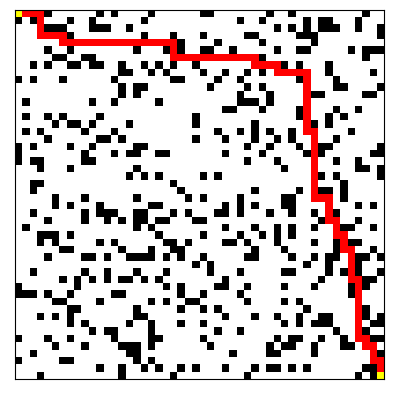

In [9]:
patharr = np.zeros((n,m))
xs, ys = zip(*path)
patharr[xs, ys] = 1

pointsarr = np.zeros((n,m))
pointsarr[start] = 1
pointsarr[end] = 1



plotarr = maze + patharr + pointsarr

fig, ax = plt.subplots()
cmap = ListedColormap(['black', 'white', 'red', 'yellow'])
mesh = plt.pcolormesh(plotarr, cmap=cmap, linewidth=0.2, vmin = 0, vmax = 3 )
ax.set_aspect('equal')
ax.invert_yaxis()
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("out.png")


<H3> Maze Animation </H3>

In [ ]:
n = 50
m = 50
start = (0,0)
end = (n-1,m-1)

maze = createmaze(n,m,start,end)

astar = Astar(maze,start,end,animate=True)

astar.ani("mymaze")




<H2> Varying mu </h2>

<h3> Varying mu using grid heuristic.</h3>

In [7]:
n = 100
m = 100
start = (0,0)
end = (n-1,m-1)

nMazes = 1000
nMus = 100

pathlength = np.zeros((nMazes,100))
mus = np.linspace(0,1,nMus)
times = np.zeros((nMazes,nMus))

for i in range(nMazes):
    maze = createmaze(n,m,start,end)
    for j in range(nMus):
        startTime = time.time()
        
        astarObj = Astar(maze,start,end,mus[j],heuristic = "grid")
        
        path = astarObj.search()
        
        endTime = time.time()
        
        if path != -1:
            times[i,j] = endTime - startTime
            pathlength[i,j] = len(path)
        else:
            times[i,j] = np.nan
            pathlength[i,j] = np.nan

In [8]:
#Removing cases where the shortest path wasn't found.
to_delete = []
for i in range(nMazes):
    if np.isnan(pathlength[i,0]):
        to_delete.append(i)

        
cleanPathlength = np.delete(pathlength,to_delete,0)
cleanTimes = np.delete(times,to_delete,0)

avgpath = np.zeros(len(cleanPathlength))
avgtime = np.zeros(len(cleanTimes))
for i in range(len(cleanTimes)):
    avgpath = np.mean(cleanPathlength, axis=0)
    avgtime = np.mean(cleanTimes, axis=0)



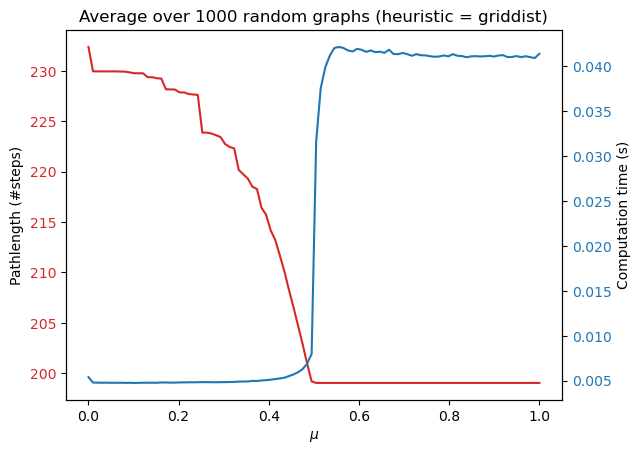

In [9]:
#Plotting averages
fig,ax1 = plt.subplots()
ax1.set_title("Average over 1000 random graphs (heuristic = griddist)")
color = 'tab:red'
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel("Pathlength (#steps)")
ax1.plot(mus,avgpath, color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel("Computation time (s)")
ax2.plot(mus,avgtime, color = color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("average_griddist.png")

<h3>Varying mu using euclidean heuristic</h3>

In [10]:
n = 100
m = 100
start = (0,0)
end = (n-1,m-1)

nMazes = 1000
nMus = 100

pathlength = np.zeros((nMazes,100))
mus = np.linspace(0,1,nMus)
times = np.zeros((nMazes,nMus))

for i in range(nMazes):
    maze = createmaze(n,m,start,end)
    for j in range(nMus):
        startTime = time.time()
        
        astarObj = Astar(maze,start,end,mus[j],heuristic = "euc")
        
        path = astarObj.search()
        
        endTime = time.time()
        
        if path != -1:
            times[i,j] = endTime - startTime
            pathlength[i,j] = len(path)
        else:
            times[i,j] = np.nan
            pathlength[i,j] = np.nan

In [11]:
#Removing cases where the shortest path wasn't found.
to_delete = []
for i in range(nMazes):
    if np.isnan(pathlength[i,0]):
        to_delete.append(i)

        
cleanPathlength = np.delete(pathlength,to_delete,0)
cleanTimes = np.delete(times,to_delete,0)

avgpath = np.zeros(len(cleanPathlength))
avgtime = np.zeros(len(cleanTimes))
for i in range(len(cleanTimes)):
    avgpath = np.mean(cleanPathlength, axis=0)
    avgtime = np.mean(cleanTimes, axis=0)


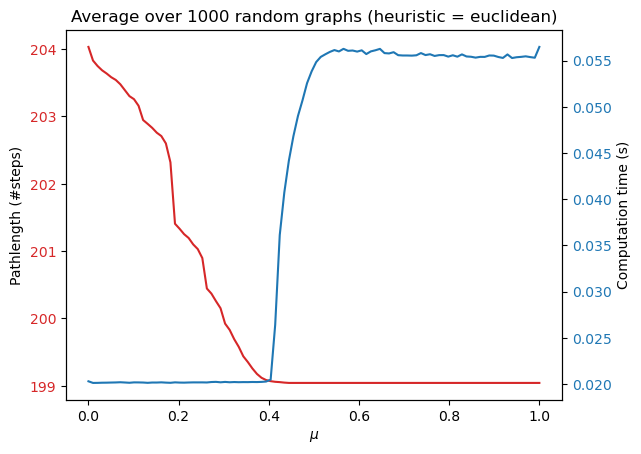

In [12]:
#Plotting averages
fig,ax1 = plt.subplots()
ax1.set_title("Average over 1000 random graphs (heuristic = euclidean)")
color = 'tab:red'
ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel("Pathlength (#steps)")
ax1.plot(mus,avgpath, color = color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel("Computation time (s)")
ax2.plot(mus,avgtime, color = color)
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("average_eucdist.png")

<H3> Making animations of same maze for a few different mu using both heuristics </H3>

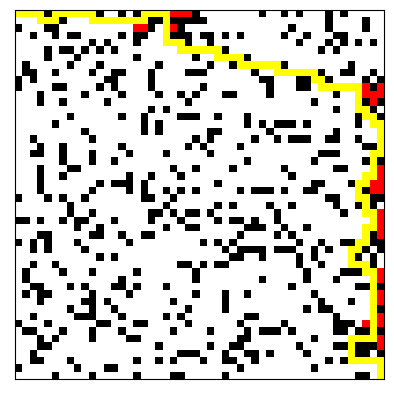

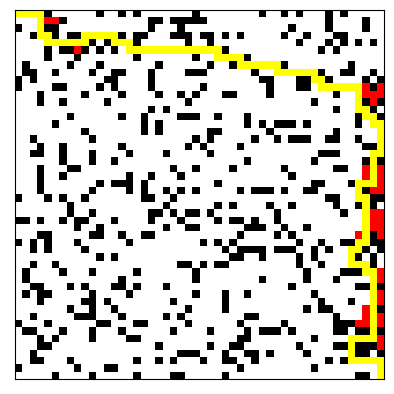

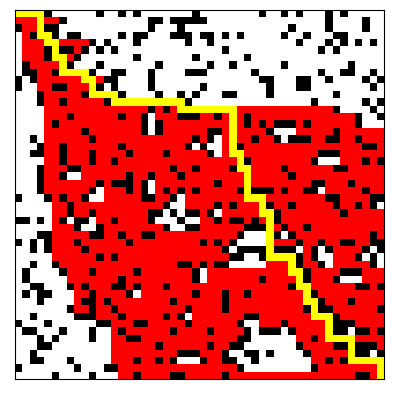

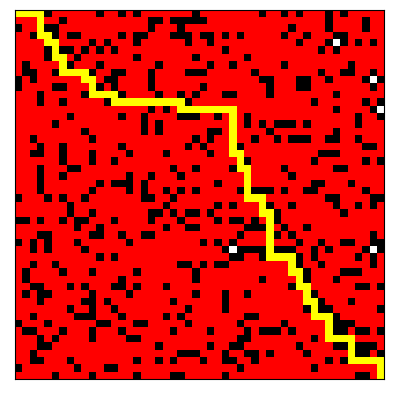

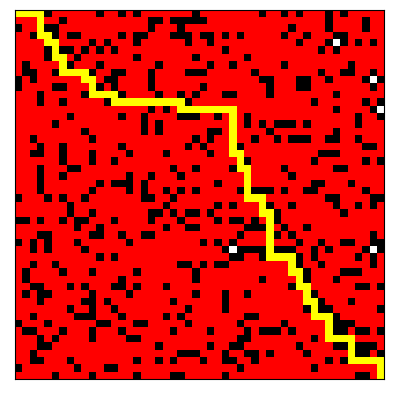

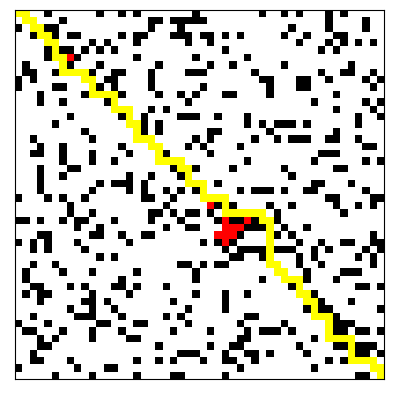

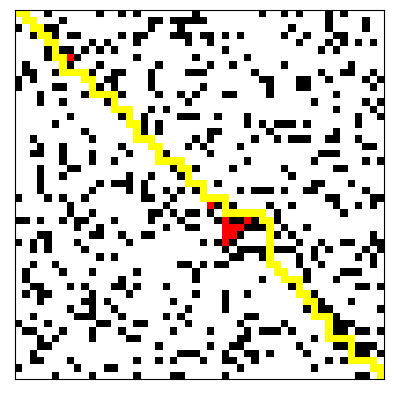

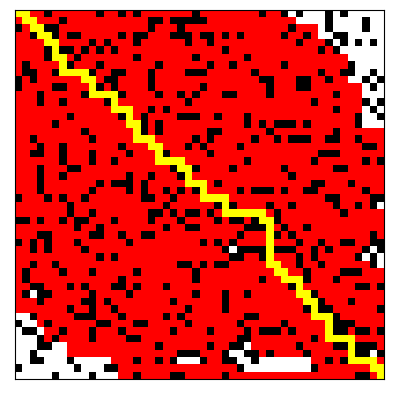

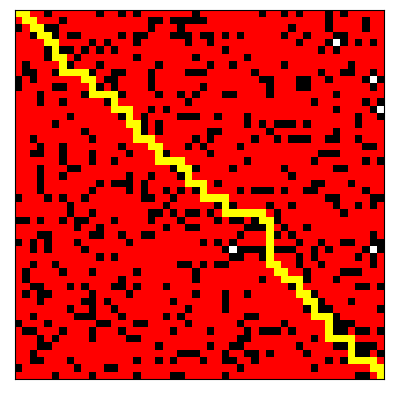

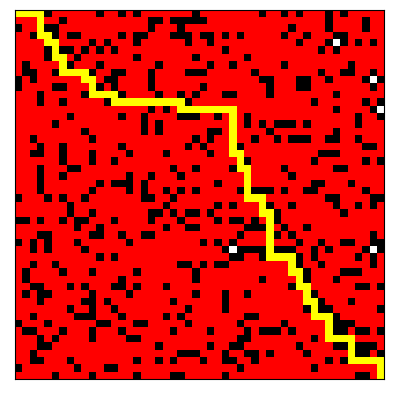

In [16]:
n = 50
m = 50
start = (0,0)
end = (n-1,m-1)

maze = createmaze(n,m,start,end)


hs = ["grid","euc"]
mus = np.linspace(0,1,5)
for h in hs:
    
    for mu in mus:
        astarmus = Astar(maze, start,end,mu=mu,heuristic=h,animate=True)

        astarmus.search()

        astarmus.ani(f"{mu}_{h}")



<H3> Varying mu for non-random mazes</h3>

In [17]:
def plotMusForMaze(maze,start,end,name,heuristic = "grid",nMus = 100):
    endsArr = np.zeros(maze.shape)
    endsArr[start] = 1
    endsArr[end] = 1
    plotArr = maze + endsArr
    #Plot maze
    fig, ax = plt.subplots()
    cmap = ListedColormap(['black', 'white','yellow'])
    mesh = plt.pcolormesh(plotArr, cmap=cmap, linewidth=0.2, vmin = 0, vmax = 2 )
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(f"maze_{name}.png")
    plt.close(fig)
    
    pathlength = np.zeros((nMus))
    mus = np.linspace(0,1,nMus)
    times = np.zeros((nMus))
    
    for i in range(nMus):
        startTime = time.time()
        
        astarObj = Astar(maze,start,end,mus[i],heuristic)
        
        path = astarObj.search()
        
        endTime = time.time()
        
        if path != -1:
            times[i] = endTime - startTime
            pathlength[i] = len(path)
        else:
            times[i] = np.nan
            pathlength[i] = np.nan

    fig,ax1 = plt.subplots()
    ax1.set_title(rf"Pathlength and computation time vs $\mu$ in {name}")
    color = 'tab:red'
    ax1.set_xlabel(r'$\mu$')
    ax1.set_ylabel("Pathlength (#steps)")
    ax1.plot(mus,pathlength, color = color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel("Computation time (s)")
    ax2.plot(mus,times, color = color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.savefig(f"mus_{heuristic}_{name}.png")
    plt.close(fig)
    
    
    

<h3>L-Shaped Maze</h3>

In [ ]:
lshaped = np.ones((100,100))

for i in range(80):
    lshaped[i,79] = 0
    lshaped[79,i] = 0

lshaped[65,79] = 1


plotMusForMaze(lshaped,(0,0),(99,99),"L-shaped",heuristic = "grid",nMus = 100)


<h3>Dense Maze</h3>

In [19]:
dense_maze = np.genfromtxt('dense_maze.csv', delimiter=',')

In [ ]:
plotMusForMaze(dense_maze,(0,0),(99,99),"Dense Maze",heuristic = "grid",nMus = 100)